c:\Users\purs0007\AppData\Local\anaconda3\envs\abits\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


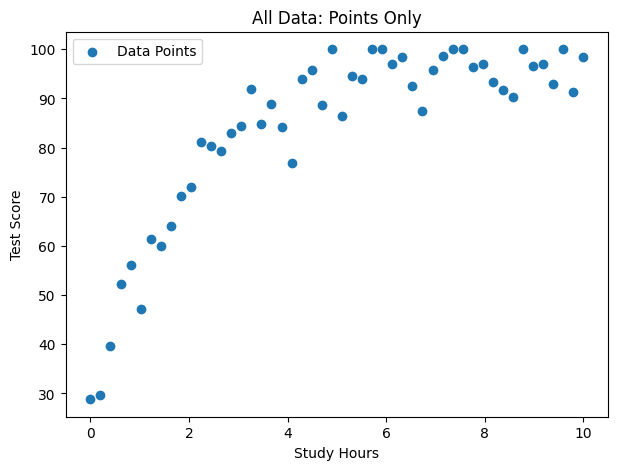

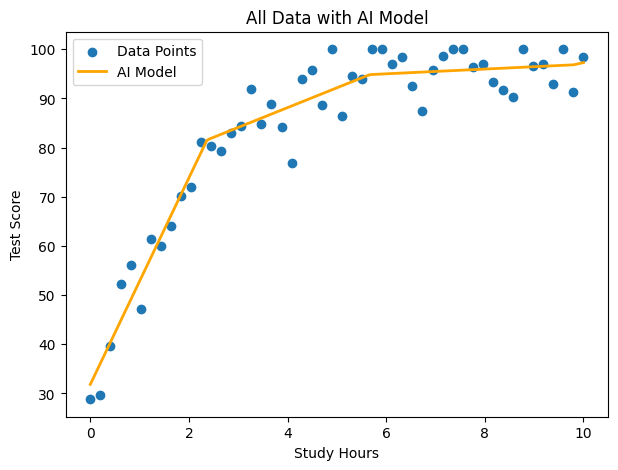

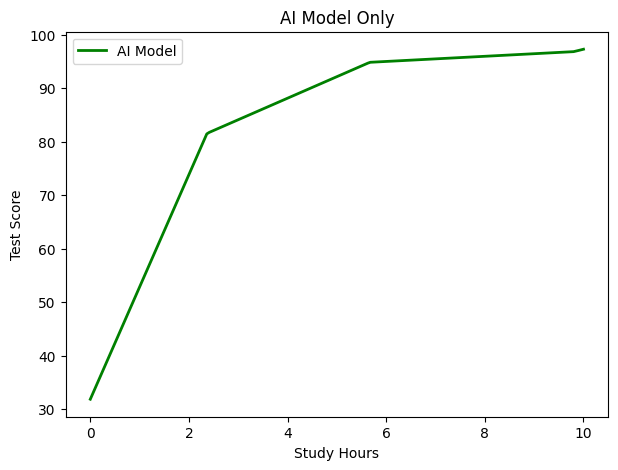

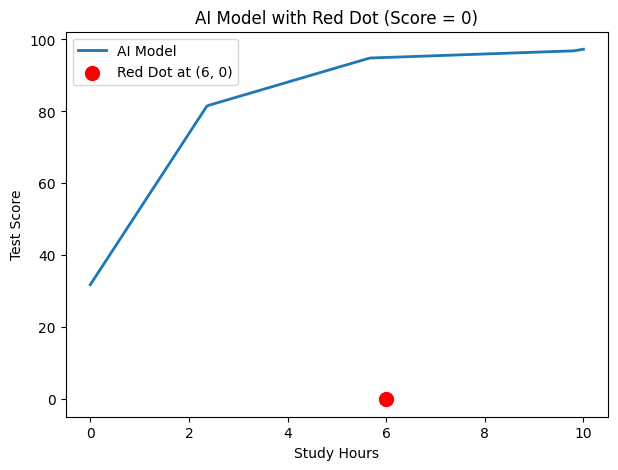

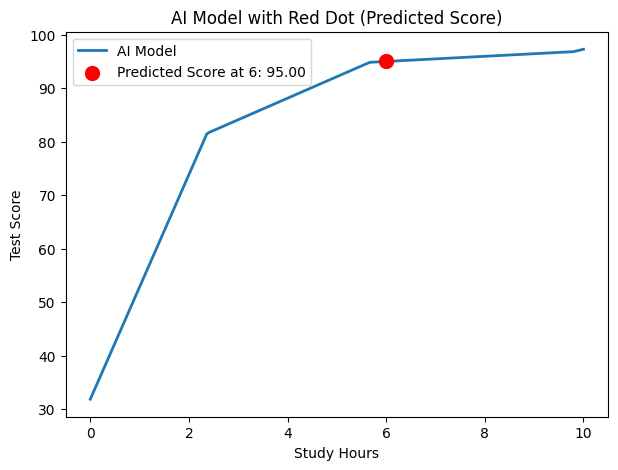

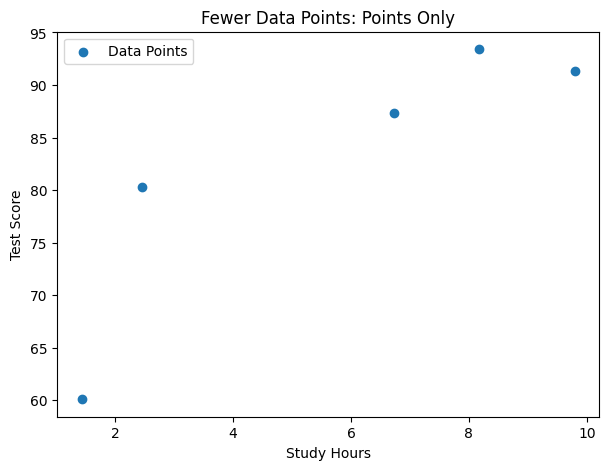

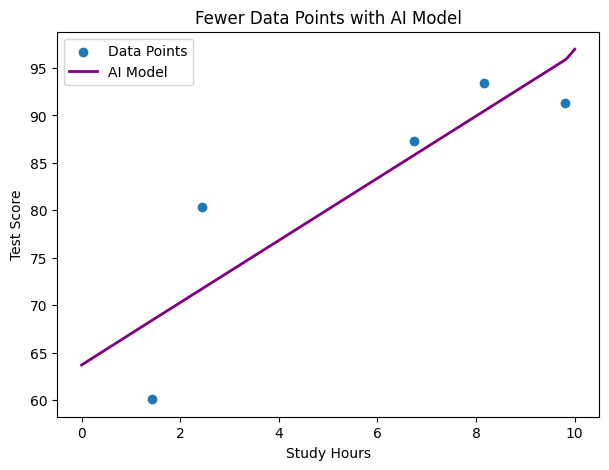

c:\Users\purs0007\AppData\Local\anaconda3\envs\abits\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


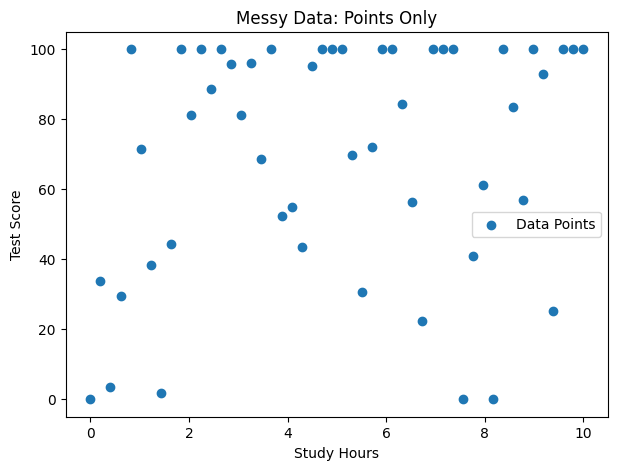

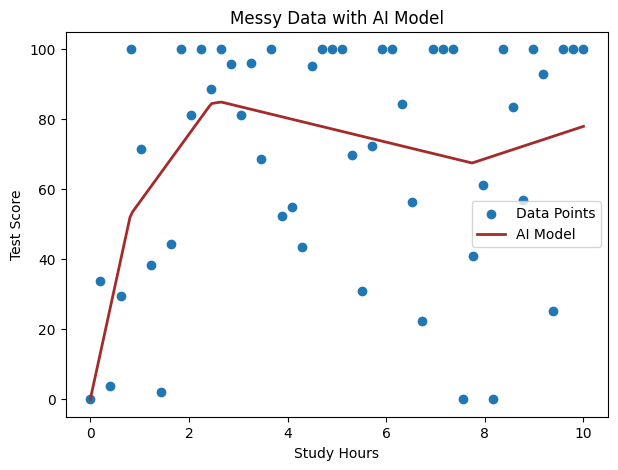

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Set random seed for reproducibility
np.random.seed(0)

# -------------------------------
# Create our pretend test score data
# -------------------------------
# x: hours spent studying (from 0 to 10)
x = np.linspace(0, 10, 50)
# This function means you get a big jump at first, then smaller jumps as you study more.
true_func = lambda x: 20 + 80 * (1 - np.exp(-0.5 * x))
# Add a little bit of random error (noise) but keep scores between 0 and 100.
noise = np.random.normal(0, 5, size=x.shape)
y = np.clip(true_func(x) + noise, 0, 100)

# -------------------------------
# Train our AI Model on the full data
# -------------------------------
x_reshaped = x.reshape(-1, 1)
ai_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=10000, random_state=0)
ai_model.fit(x_reshaped, y)

# Create a smooth line for the AI model predictions.
x_dense = np.linspace(0, 10, 200)
x_dense_reshaped = x_dense.reshape(-1, 1)
y_dense = ai_model.predict(x_dense_reshaped)

# -------------------------------
# Plot 1: All Data (Points Only)
# -------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(x, y, label='Data Points')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title('All Data: Points Only')
plt.legend()
plt.show()

# -------------------------------
# Plot 2: All Data with AI Model
# -------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(x, y, label='Data Points')
plt.plot(x_dense, y_dense, color='orange', linewidth=2, label='AI Model')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title('All Data with AI Model')
plt.legend()
plt.show()

# -------------------------------
# Plot 3: AI Model Only
# -------------------------------
plt.figure(figsize=(7, 5))
plt.plot(x_dense, y_dense, color='green', linewidth=2, label='AI Model')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title('AI Model Only')
plt.legend()
plt.show()

# -------------------------------
# Plot 4: AI Model with a Red Dot (Score = 0)
# -------------------------------
x_val = 6  # chosen study hour
y_forced = 0  # forcing score to 0
plt.figure(figsize=(7, 5))
plt.plot(x_dense, y_dense, linewidth=2, label='AI Model')
plt.scatter([x_val], [y_forced], color='red', s=100, zorder=5,
            label=f'Red Dot at ({x_val}, {y_forced})')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title('AI Model with Red Dot (Score = 0)')
plt.legend()
plt.show()

# -------------------------------
# Plot 5: AI Model with a Red Dot (Predicted Score)
# -------------------------------
predicted_y = ai_model.predict([[x_val]])[0]
plt.figure(figsize=(7, 5))
plt.plot(x_dense, y_dense, linewidth=2, label='AI Model')
plt.scatter([x_val], [predicted_y], color='red', s=100, zorder=5,
            label=f'Predicted Score at {x_val}: {predicted_y:.2f}')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title('AI Model with Red Dot (Predicted Score)')
plt.legend()
plt.show()

# -------------------------------
# FEWER DATA POINTS EXAMPLE
# -------------------------------
# Randomly choose 5 points for a less crowded example
indices_sparse = np.random.choice(len(x), size=5, replace=False)
x_sparse = x[indices_sparse]
y_sparse = y[indices_sparse]

# Train the AI Model on the fewer data points
x_sparse_reshaped = x_sparse.reshape(-1, 1)
ai_model_sparse = MLPRegressor(hidden_layer_sizes=(50,), max_iter=10000, random_state=0)
ai_model_sparse.fit(x_sparse_reshaped, y_sparse)
y_sparse_dense = ai_model_sparse.predict(x_dense_reshaped)

# Plot 6a: Fewer Data Points (Points Only)
plt.figure(figsize=(7, 5))
plt.scatter(x_sparse, y_sparse, label='Data Points')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title('Fewer Data Points: Points Only')
plt.legend()
plt.show()

# Plot 6b: Fewer Data Points with AI Model
plt.figure(figsize=(7, 5))
plt.scatter(x_sparse, y_sparse, label='Data Points')
plt.plot(x_dense, y_sparse_dense, color='purple', linewidth=2, label='AI Model')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title('Fewer Data Points with AI Model')
plt.legend()
plt.show()

# -------------------------------
# MESSY DATA EXAMPLE (Non-Uniform Noise)
# -------------------------------
# Make extra messy data: noise gets bigger with more study hours.
noise_non_uniform = np.random.normal(0, 30 * (1 + x/10), size=x.shape)
y_noisy = np.clip(true_func(x) + noise_non_uniform, 0, 100)

# Train the AI Model on the messy data
ai_model_noisy = MLPRegressor(hidden_layer_sizes=(50,), max_iter=10000, random_state=0)
ai_model_noisy.fit(x_reshaped, y_noisy)
y_noisy_dense = ai_model_noisy.predict(x_dense_reshaped)

# Plot 7a: Messy Data (Points Only)
plt.figure(figsize=(7, 5))
plt.scatter(x, y_noisy, label='Data Points')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title('Messy Data: Points Only')
plt.legend()
plt.show()

# Plot 7b: Messy Data with AI Model
plt.figure(figsize=(7, 5))
plt.scatter(x, y_noisy, label='Data Points')
plt.plot(x_dense, y_noisy_dense, color='brown', linewidth=2, label='AI Model')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title('Messy Data with AI Model')
plt.legend()
plt.show()
